- 0: Indicates that the user did not purchase the product during the test period
- 1: Indicates that the user purchased the product during the test period
In this AB test, we are divided into two groups: the experimental group and the control group:
- Control group (control group): This group of users will see the old version of the landing page
- Experimental group (treatment group): This group of users will see the new landing page

In [50]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import statsmodels.stats.api as sms 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [51]:
#import data
data_url="https://raw.githubusercontent.com/Horizon430/PortfolioProjects/main/A%5CB%20test/ab_data.csv"
df = pd.read_csv(data_url)

In [52]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [54]:
#data cleaning
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [55]:
df.duplicated().sum()

0

In [56]:
df['user_id'].duplicated().sum()

3894

In [57]:
df[df['user_id'].duplicated()]['user_id']

2656      698120
2893      773192
7500      899953
8036      790934
10218     633793
           ...  
294308    905197
294309    787083
294328    641570
294331    689637
294355    744456
Name: user_id, Length: 3894, dtype: int64

In [58]:
df[df['user_id'] == 698120]

,user_id,timestamp,group,landing_page,converted
988,698120,2017-01-22 07:09:37.540970,control,new_page,0
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0


In [59]:
del_id=df[df['user_id'].duplicated()]['user_id'].values

In [60]:
len(del_id)

3894

In [61]:
df['user_id'].isin(del_id)

0         False
1         False
2         False
3         False
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477    False
Name: user_id, Length: 294478, dtype: bool

In [62]:
df_new=df[~df['user_id'].isin(del_id)]
df_new

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [63]:
date_days = pd.to_datetime(df_new['timestamp'],format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

In [64]:
date_days

0         2017-01-21
1         2017-01-12
2         2017-01-11
3         2017-01-08
4         2017-01-21
             ...    
294473    2017-01-03
294474    2017-01-12
294475    2017-01-22
294476    2017-01-15
294477    2017-01-16
Name: timestamp, Length: 286690, dtype: object

In [65]:
len(date_days.unique()) 

23

In [66]:
df_new['timestamp'].str.split(" ")

0         [2017-01-21, 22:11:48.556739]
1         [2017-01-12, 08:01:45.159739]
2         [2017-01-11, 16:55:06.154213]
3         [2017-01-08, 18:28:03.143765]
4         [2017-01-21, 01:52:26.210827]
                      ...              
294473    [2017-01-03, 22:28:38.630509]
294474    [2017-01-12, 00:51:57.078372]
294475    [2017-01-22, 11:45:03.439544]
294476    [2017-01-15, 01:20:28.957438]
294477    [2017-01-16, 12:40:24.467417]
Name: timestamp, Length: 286690, dtype: object

In [67]:
[i[0] for i in df_new['timestamp'].str.split(" ")]

['2017-01-21',
 '2017-01-12',
 '2017-01-11',
 '2017-01-08',
 '2017-01-21',
 '2017-01-10',
 '2017-01-19',
 '2017-01-17',
 '2017-01-04',
 '2017-01-15',
 '2017-01-18',
 '2017-01-21',
 '2017-01-09',
 '2017-01-22',
 '2017-01-22',
 '2017-01-22',
 '2017-01-17',
 '2017-01-08',
 '2017-01-24',
 '2017-01-17',
 '2017-01-12',
 '2017-01-09',
 '2017-01-23',
 '2017-01-20',
 '2017-01-23',
 '2017-01-05',
 '2017-01-12',
 '2017-01-24',
 '2017-01-06',
 '2017-01-13',
 '2017-01-05',
 '2017-01-05',
 '2017-01-07',
 '2017-01-11',
 '2017-01-23',
 '2017-01-11',
 '2017-01-19',
 '2017-01-03',
 '2017-01-02',
 '2017-01-16',
 '2017-01-03',
 '2017-01-22',
 '2017-01-08',
 '2017-01-05',
 '2017-01-18',
 '2017-01-22',
 '2017-01-20',
 '2017-01-23',
 '2017-01-12',
 '2017-01-05',
 '2017-01-18',
 '2017-01-22',
 '2017-01-17',
 '2017-01-22',
 '2017-01-20',
 '2017-01-09',
 '2017-01-03',
 '2017-01-10',
 '2017-01-11',
 '2017-01-19',
 '2017-01-23',
 '2017-01-11',
 '2017-01-19',
 '2017-01-24',
 '2017-01-07',
 '2017-01-08',
 '2017-01-

In [68]:
len(set([i[0] for i in df_new['timestamp'].str.split(" ")]))

23

In [69]:
(((df_new['group']=='treatment')&(df_new['landing_page']=='new_page'))|((df_new['group']=='control')&(df_new['landing_page']=='old_page'))).sum()

286690

In [70]:
pd.crosstab(df_new['group'], df_new['landing_page'])

landing_page,new_page,old_page
group,,
control,0,143293
treatment,143397,0


In [71]:
control_sample=df_new[df_new['group'] == 'control']
treatment_sample = df_new[df_new['group'] == 'treatment']

In [72]:
control_sample

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [73]:
treatment_sample

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [74]:
ab_test = pd.concat([control_sample, treatment_sample], axis=0) 
ab_test.reset_index(drop=True, inplace=True)
ab_test

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
286685,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
286686,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
286687,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
286688,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [75]:
conversion_rates = ab_test.groupby('group')['converted'].agg([np.mean,np.std])

In [76]:
conversion_rates

,mean,std
group,,
control,0.120173,0.325165
treatment,0.118726,0.323467


In [77]:
conversion_rates.columns = ['conversion_rate', 'std_deviation']
conversion_rates

,conversion_rate,std_deviation
group,,
control,0.120173,0.325165
treatment,0.118726,0.323467


Text(0, 0.5, 'Group Conversion Ratio')

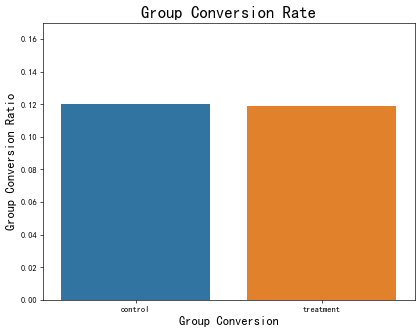

In [78]:
plt.rcParams['font.family'] = 'SimHei'
# plt.rcParams['font.family'] = "Arial Unicode MS"
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,6),dpi=60) 

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False) 

plt.ylim(0, 0.17) 
plt.title( 'Group Conversion Rate', fontsize=20) 
plt.xlabel('Group Conversion', fontsize=15) 
plt.ylabel('Group Conversion Ratio', fontsize=15)

In [79]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [80]:
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

In [81]:
control_results

0         0
1         0
2         1
3         0
4         0
         ..
143288    0
143289    0
143290    0
143291    0
143292    0
Name: converted, Length: 143293, dtype: int64

In [82]:
treatment_results

143293    0
143294    0
143295    1
143296    1
143297    1
         ..
286685    0
286686    0
286687    0
286688    0
286689    0
Name: converted, Length: 143397, dtype: int64

In [83]:
control_results.sum()

17220

In [84]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

In [85]:
nobs

[143293, 143397]

In [86]:
successes

[17220, 17025]

In [87]:
z_stat, pval = proportions_ztest(successes, nobs=nobs)

In [88]:
z_stat

1.1944850812796501

In [89]:
pval

0.23228827305833621

In [90]:
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

In [91]:
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: 1.19
p-value: 0.232
ci 95% for control group: [0.118, 0.122]
ci 95% for treatment group: [0.117, 0.120]


Since our calculated P value = 0.232 is much higher than the significant level alpha=0.05$, we cannot reject the null hypothesis H0.
